In [92]:
#importing the common packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
#importing modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [94]:
#importing the model parameters or matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [95]:
#importing the file
from google.colab import files
data_to_load = files.upload()

Saving WA_Fn_UseC_Telco-Customer-Churn.csv to WA_Fn_UseC_Telco-Customer-Churn (1).csv


In [96]:
#renaming the file and reading it
import io
df = pd.read_csv(io.BytesIO(data_to_load['WA_Fn_UseC_Telco-Customer-Churn.csv']))

**Analysing and Visualising the dataset**

In [97]:
#checking the features of the dataset as well as the top 5 rows
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95       1889.50    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [98]:
#checking the bottom 5 rows of the dataset
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [99]:
#checking the number of rows and columns of the dataset
df.shape

(7043, 21)

In [100]:
#checking the type of data under each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
#converting datatype under 'TotalCharges' from object to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [102]:
#checking whether data under 'TotalCharges' is converted from object to float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
#checking if there are any null values in the rows
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [104]:
#dropping the null values
df.dropna()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

In [105]:
#finding the statistical parameters of the features
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [106]:
#transposing the same data
df.describe().T

count         mean          std    min     25%       50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.000   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8500   118.75  
TotalCharges    3794.7375  8684.80

#Handling Outliers

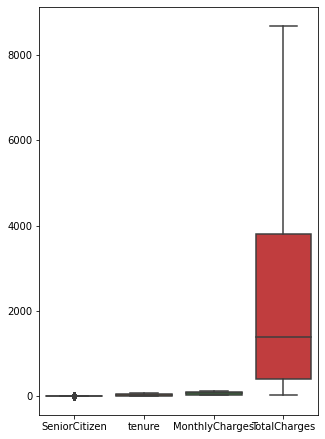

In [107]:
#checking for outliers using boxplot . There are no outlier values in that can be found from the box plot
plt.figure(figsize = (5,7.5))
sns.boxplot(data = df)

**Data Processing**

In [108]:
#seperating the input variables(x) and output variable(y) into 2 different datasets
x1 = df.drop(['Churn'],axis = 1)
x1

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  
0              29.85         29.85  
1              56.95       1889.50  
2              53.85        108.15  
3              42.30       1840.75  
4              70.70        151.65  
...              ...           ...  
7038           84.80       1990.50  
7039          103.20       7362.90  
7040           29.60        346.45  
7041           74.40        306.60  
7042          105.65       6844.50  

[7043 rows x 20 columns]

In [109]:
y = df[['Churn']]
y

Churn
0       No
1       No
2      Yes
3       No
4      Yes
...    ...
7038    No
7039    No
7040    No
7041   Yes
7042    No

[7043 rows x 1 columns]

In [110]:
#One Hot Encoding to convert categorical input variables into binary values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)])
x = transformer.fit_transform(x1)
x

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [111]:
#converting the output variable into binary
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y['Churn']  = LE.fit_transform(y['Churn'])
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]

#Data Split

In [112]:
#splitting the data into test and combined data(training + validation) in 90-10 percentage
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(x,y,train_size=0.90, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((6338, 41), (705, 41), (6338, 1), (705, 1))

In [113]:
#splitting the combined data into test and validation data in 50-50 percentage
X_val,X_test,Y_val,Y_test = train_test_split(X_combine,Y_combine,test_size=0.50, random_state=500)
X_val.shape,X_test.shape,Y_val.shape,Y_test.shape

((352, 41), (353, 41), (352, 1), (353, 1))

#Build Model - Logistic Regression

In [114]:
#model training on training data and predicting for test data
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train,Y_train)
Y_pred = LG.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Model Evaluation - Logistic Regression**

In [115]:
from sklearn.metrics import log_loss
log_ls = log_loss(Y_test, Y_pred)
log_ls

6.3598857110694595

In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[243  24]
 [ 41  45]]


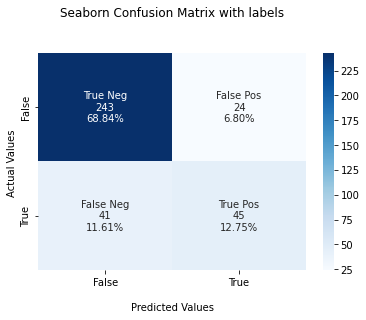

In [117]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [118]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

accuracy score 0.8158640226628895
recall score 0.5232558139534884
precision score 0.6521739130434783
f1 score 0.5806451612903226
roc_auc_score 0.7166840867520251


#Build Model - Decision Tree

In [119]:
#splitting the data into test and combined data(training + validation) in 90-10 percentage
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(x,y,train_size=0.90, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((6338, 41), (705, 41), (6338, 1), (705, 1))

In [120]:
#splitting the combined data into test and validation data in 50-50 percentage
X_val,X_test,Y_val,Y_test = train_test_split(X_combine,Y_combine,test_size=0.50, random_state=500)
X_val.shape,X_test.shape,Y_val.shape,Y_test.shape

((352, 41), (353, 41), (352, 1), (353, 1))

In [121]:
#model training on training data and predicting for test data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

**Model Evaluation - Decision Tree**

In [122]:
from sklearn.metrics import log_loss
log_ls = log_loss(Y_test, Y_pred)
log_ls

6.359901567109152

In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[236  31]
 [ 34  52]]


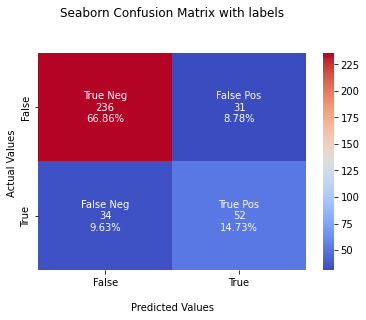

In [124]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [125]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

accuracy score 0.8158640226628895
recall score 0.6046511627906976
precision score 0.6265060240963856
f1 score 0.6153846153846154
roc_auc_score 0.74427314693842


#Build Model - Random Forest

In [126]:
#splitting the data into test and combined data(training + validation) in 90-10 percentage
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(x,y,train_size=0.90, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((6338, 41), (705, 41), (6338, 1), (705, 1))

In [127]:
#splitting the combined data into test and validation data in 50-50 percentage
X_val,X_test,Y_val,Y_test = train_test_split(X_combine,Y_combine,test_size=0.50, random_state=500)
X_val.shape,X_test.shape,Y_val.shape,Y_test.shape

((352, 41), (353, 41), (352, 1), (353, 1))

In [128]:
#model training on training data and predicting for test data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini' , random_state = 0)
rfc.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


**Model Evaluation - Random Forest**

In [129]:
from sklearn.metrics import log_loss
log_ls = log_loss(Y_test, Y_pred)
log_ls

6.359901567109152

In [130]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[236  31]
 [ 34  52]]


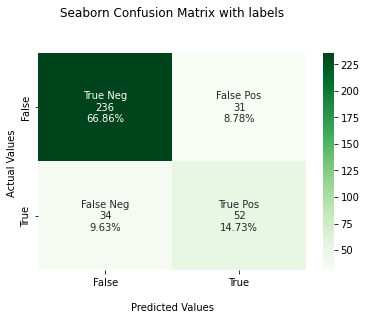

In [131]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [132]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

accuracy score 0.8158640226628895
recall score 0.6046511627906976
precision score 0.6265060240963856
f1 score 0.6153846153846154
roc_auc_score 0.74427314693842


#Build Model - Support Vector Classifier



In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.ravel(y),train_size=0.90, random_state=500)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6338, 41), (705, 41), (6338,), (705,))

In [134]:
from sklearn.svm import SVC
svcm = SVC()
svcm.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)

**Model Evaluation - Support Vector Classifier**

In [135]:
from sklearn.metrics import log_loss
log_ls = log_loss(Y_test, Y_pred)
log_ls

6.270941493881801

In [136]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[467  63]
 [ 65 110]]


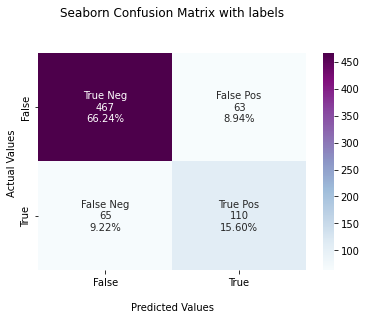

In [137]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [138]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

accuracy score 0.8184397163120567
recall score 0.6285714285714286
precision score 0.6358381502890174
f1 score 0.632183908045977
roc_auc_score 0.7548517520215634


In [139]:
#getting model parametes
svcm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Grid Search - Support Vector Classifier

In [140]:
param_grid = {'C' :[0.1,1,10,100,1000], 'gamma' :[0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [141]:
#cross-validation
from sklearn.model_selection import GridSearchCV

In [142]:
#an estimator like SVC and creates a new estimator that behaves exactly the same 
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 3)

In [143]:
#fitting the grid into the training dataset
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.781 total time=   1.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   1.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   1.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time=   1.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.733 total time=   1.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.733 total time=   1.5s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.733 total time=   1.5s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.733 total time=   1.5s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.732 total time=   1.5s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.733 total time=   1.5s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Inspect the best parameters found by GridSearchCV in the best_params_attribute and the best estimator in best_estimator_attribute :

In [144]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [145]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [146]:
#Re-run predictions on this grid object 
grid_predictions = grid.predict(X_test)

In [147]:
print(confusion_matrix(Y_test,grid_predictions))

[[483  47]
 [ 82  93]]
